In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/togo-dapaong_qc.csv")  # Update path as needed

# Summary statistics
display(df.describe())

# Missing value report
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
display(missing[missing_pct > 5])  # Columns with >5% nulls


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

Comments    525600
dtype: int64

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/togo-dapaong_qc.csv")  # Adjust the path if you're inside notebooks/

# Show basic summary statistics for numeric columns
df.describe()

# Calculate missing values and percentage
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100

# Display columns with more than 5% missing values
missing_report = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_pct
})
missing_report = missing_report[missing_report["Missing %"] > 5]

missing_report


Missing Count  Missing %
Comments         525600      100.0

In [16]:
# Make a copy of the original dataframe
df_clean = df.copy()

# Define the key columns you want to clean
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']  # adjust as needed

# Fill missing values in key columns with median
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())


In [17]:
df_clean.to_csv("../../data/benin-malanville.csv", index=False)


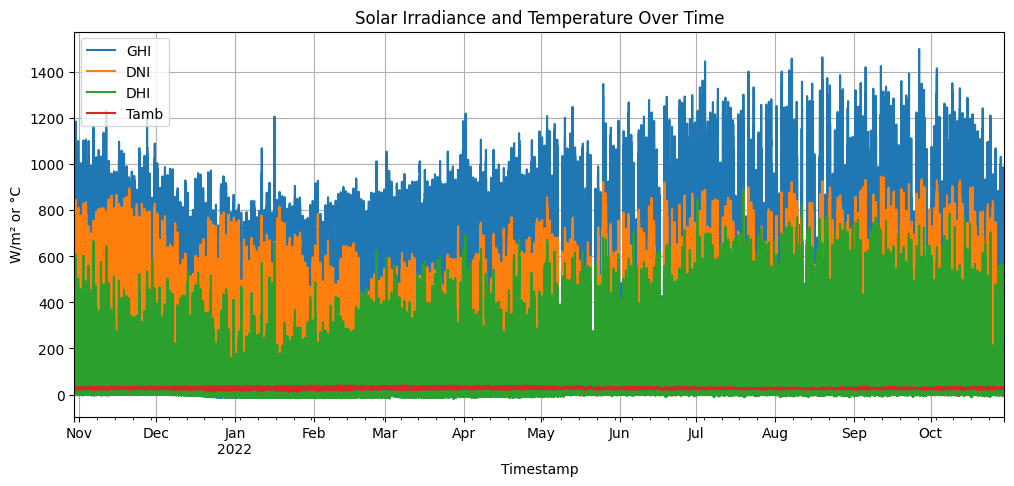

In [18]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 5))
plt.title("Solar Irradiance and Temperature Over Time")
plt.ylabel("W/m² or °C")
plt.grid()
plt.show()


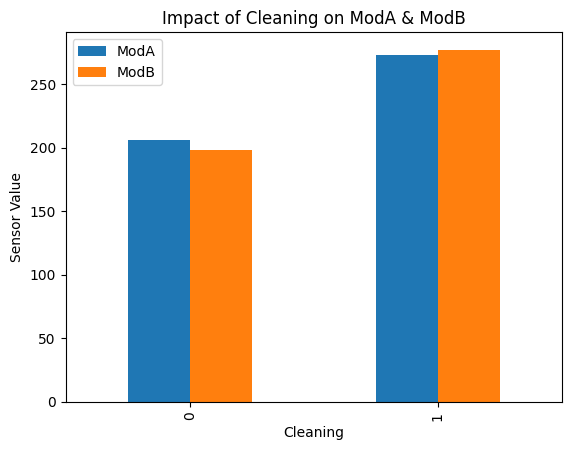

In [20]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Impact of Cleaning on ModA & ModB")
plt.ylabel("Sensor Value")
plt.show()


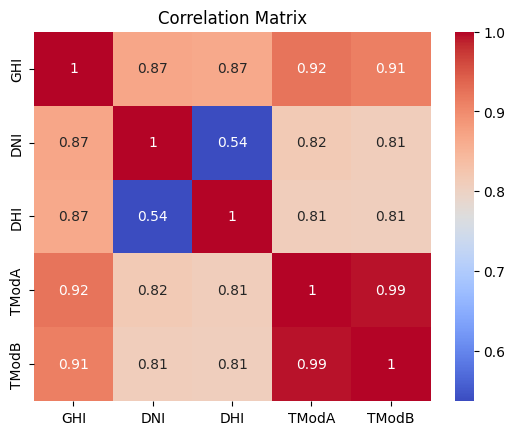

In [19]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



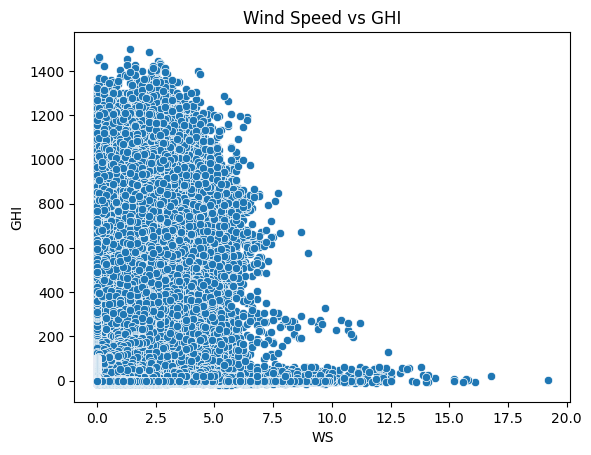

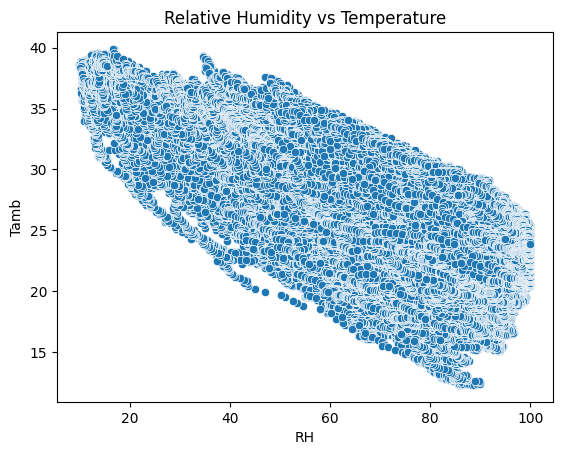

In [21]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Temperature")
plt.show()


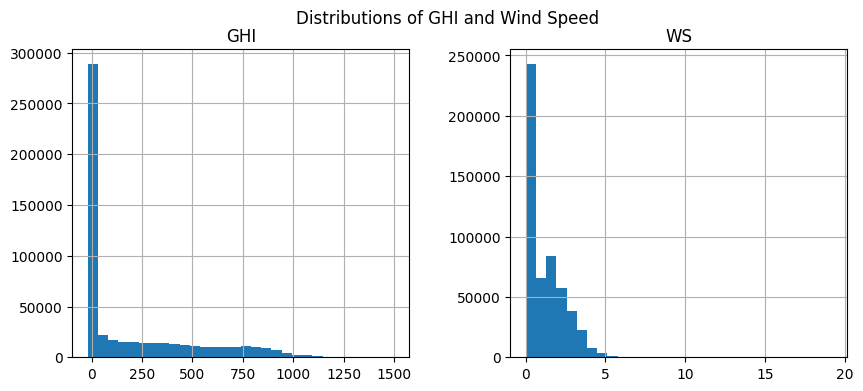

In [22]:
# Wind direction histogram
import plotly.express as px

fig = px.histogram(df_clean, x='WD', nbins=36, title="Wind Direction")
fig.show()

# GHI and Wind Speed histograms
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(10, 4))
plt.suptitle("Distributions of GHI and Wind Speed")
plt.show()



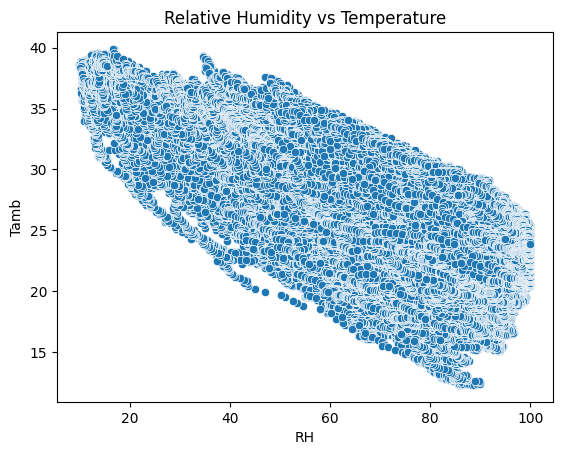

In [23]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Temperature")
plt.show()


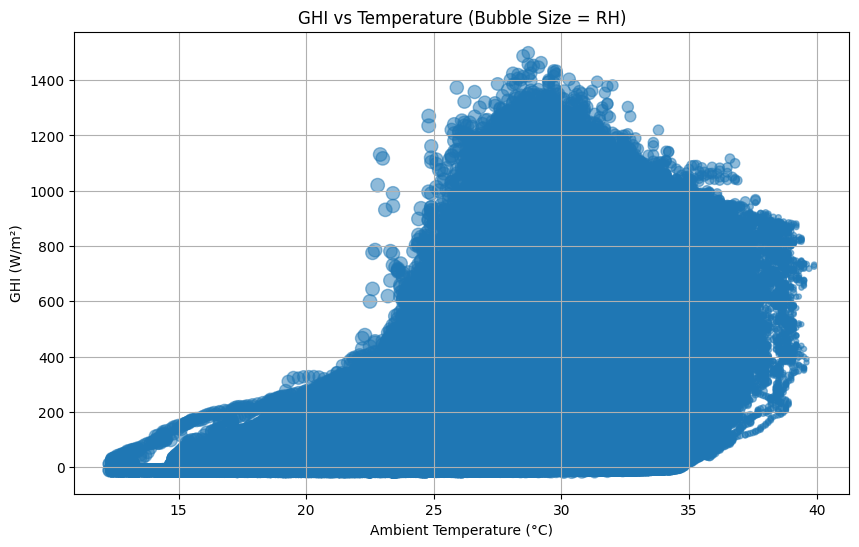

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble Size = RH)")
plt.grid()
plt.show()
